# Homework 3: How similar is SARS-Cov-2 to other viruses?

Evolution is the process by which different living organisms are believed to have developed from earlier forms during the earth's history. The main component that evolves through time is the DNA which is passed on to the next generation. Genetic mutations, variation, and recombination are processes that modify DNA and cause variation in the population. The main drivers of evolution are natural selection and genetic drift that act on this variation. Through time, some characteristics become more common or rare in the population resulting in a change in heritable ones arising over successive generations.

Even though we do not consider viruses to be *living* organisms, they are still subject to evolution. Their genetic material undergoes the same transformations and selection, resulting in new variants and types of viruses.

<div>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/70/Phylogenetic_tree.svg/800px-Phylogenetic_tree.svg.png" width="500">
</div>

Comparing the characteristics of different organisms allows us to estimate their evolutionary distance. We use genetic material as a proxy for these characteristics. We estimate evolutionary distance as the number of transformation events that would occur for one organism to become genetically identical. In practice, this means aligning genetic sequences and observing the number of transformation events. Performing multiple sequence alignment and calculating pairwise distances gives us a distance matrix.

One way of presenting the evolutionary distance between organisms is with a phylogenetic tree. Similar organisms are connected via their common ancestor, even though we do not have genetic data to prove their existence. However, these common ancestors likely existed in the past due to evolution. The most common algorithms for building phylogenetic trees are the UPGMA and Neighbor-Joining algorithms. Many frequentist and Bayesian variations of these are also available online.

Once we know the evolution of the virus, we can expand our knowledge about similar viruses to our virus of interest. Our task is implementing the neighbor-joining method, a plotting function, and constructing a phylogenetic tree of coronaviruses. In the last problem, we will see how recombination can seemingly contradict the flow of evolution.

In [1]:
import numpy as np
import pandas as pd
from Bio import Entrez

In [2]:
# In order to import from the python file without hassle, we add the current
# directory to the python path
import sys; sys.path.append(".")

Let's let the nice folks at NCBI know who we are.

In [3]:
Entrez.email = "nl4952@student.uni-lj.si"

## Problem 1: Neighbor joining implementation

**Task:** Use the template `neighbor_joining` function in the file `helper_functions.py` and implement the neighbor-joining (NJ) algorithm for agglomerative phylogenetic clustering. Your implementation should return a `Node` object to construct a tree structure and return a root Node. Use provided classes and add code where needed. Stick to the provided structure and test your solution with added unit tests. Provided unit tests do not test the correctness of your implementation but only the structure of your output.

**Implementation requirement:** In theory, the neighbor-joining algorithm results in an unrooted tree. But for plotting and later rooting the tree, your implementation should return a root node. In the last iteration of the NJ, the algorithm joins the final two nodes by creating a root node and setting the distance to each of the remaining nodes as half of the distance between them.

(Optional) In problem 2, you will be implementing a plotting function for a phylogenetic tree. For easier visual comparison of the dendrograms, you can follow instructions in the function docstring to handle node additions and tie-breaks. Even if you handle tie-breaks differently, your implementation will be valid.

**[10 points]**

In [4]:
from helper_functions import neighbor_joining

In [5]:
import unittest
from test_helper_functions import TestNeighborJoining

test_suite = unittest.TestLoader().loadTestsFromTestCase(TestNeighborJoining)
unittest.TextTestRunner().run(test_suite)

..
----------------------------------------------------------------------
Ran 2 tests in 0.064s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

## Problem 2: Plotting a phylogenetic tree

**Task:**
Use the template `plot_nj_tree` function in the file `helper_functions.py` to write a plotting function using the `matplotlib` library.
The only limitation is to use the template function and two required inputs. How you position a dendrogram, colour the plot, labels and everything else is up to you.

Leaves in a dendrogram are connected via horizontal and vertical lines. Horizontal lines represent genetic distance, while vertical ones present divergence of the last common ancestor. Below is an example of a dendrogram. Leaves do not align on a vertical line as with hierarchical clustering.

<div>
    <img src="https://upload.wikimedia.org/wikipedia/commons/d/dd/Phylogenetic_tree_of_coronaviruses.jpg" width="500">
</div>

*(Patrick C. Y. Woo, Yi Huang, Susanna K. P. Lau, and Kwok-Yung Yuen, [CC BY 3.0](https://creativecommons.org/licenses/by/3.0/deed.en) )*

Test your implementation to our provided unit tests by comparing your output plot to the ground truth in `tests/test_plotting_dendrogram.png`. Write your own tests as well.

**[10 points]**

In [6]:
import matplotlib.pyplot as plt
from helper_functions import plot_nj_tree

.
----------------------------------------------------------------------
Ran 1 test in 1.056s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

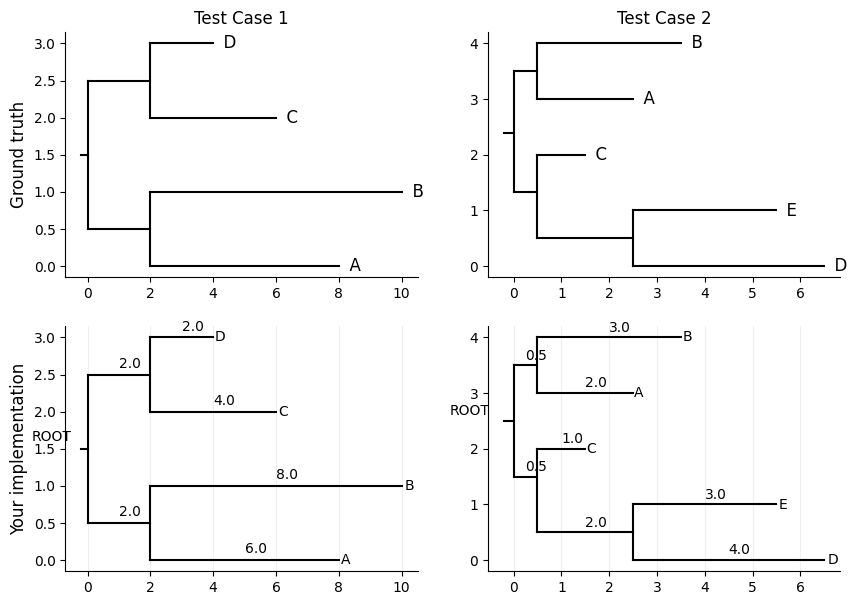

In [7]:
import unittest
from test_helper_functions import TestPlottingDendrogram

test_suite = unittest.TestLoader().loadTestsFromTestCase(TestPlottingDendrogram)
unittest.TextTestRunner().run(test_suite)

## Problem 3: Phylogenetic analysis of coronavirus

You obtained 31 aligned sequences of different coronaviruses collected at multiple time points worldwide. We used the Clustal algorithm to provide you with a multiple sequence alignment (MSA) file in `data/clustal_MSA_coronavirus.fasta`. Each entry has a form `name|accession`.

We will use Hamming distance to calculate genetic distance from pairwise sequence alignment. This naive approach estimates the distance by counting the number of mismatches in the alignment. For example, alignment *"ATC"* and *"ATT"* will have a distance of 1 while *"AT-C"* and *"CTTC"* will have a distance of 2. There are more sophisticated approaches to evolutionary distance estimation, but for our use case, Hamming distance will suffice.

Plot a phylogenetic tree of coronaviruses using your implementation of `neighbor_joining` and `plot_nj_tree`.
Compare your results to the ones found on [Wikipedia](https://en.wikipedia.org/wiki/Coronavirus). Note that three additional viruses in our alignment file do not appear in the figure.

You might notice your figure differs from the one on Wikipedia. Neighbor-joining results in an unrooted or poorly rooted tree at best. Biologists developed a cleaver approach to determine the root of a neighbor-joining tree by including one distant relative species in the alignment, called the outgroup. In the course of evolution, a distance relative diverged first. We can determine the midpoint between the outgroup and the rest of the phylogenetic tree as a root. This approach proclaims the root node as the last common ancestor between all species in the tree. We will be using the *Breda virus* as an outgroup.

Order in a dendrogram can give an impression of a nicer plot. We can achieve this by setting the left child as the one with fewer leaf nodes in a subtree.

As a final step, fetch NCBI annotations to determine their coronavirus group. Present those groupings on your figure with colors.

**Task:** Plot the most informative phylogenetic tree by iteratively improving your implementation.

**a)** Calculate pairwise distances of aligned sequences using Hamming distance.
Construct and plot the phylogeny dendrogram using your implementations of neighbor-joining and plotting algorithm in `helper_functions`. **[4 points]**

**b)** Reroot the tree using the provided `reroot_tree` function in the `helper_function`. Use it to reroot a tree using the *Breda virus* as an outgroup. You have to fetch an outgroup from the tree first, and then use the reroot function. If you added any other relational parameters to your `Node` class, make sure you adjust the function. **[+2 points]**

**c)** Implement `sort_children_by_leaves` function in the `helper_function`. Use it to sort child nodes by assigning a left child to the one with fewer leaf nodes in their subtree. **[+2 points]**

**d)** Use color and labeling to show four major groups of coronaviruses. You can find the type of coronavirus in the NCBI annotations under the *taxonomy* field. **[+1 points]**

Save your final figure in `problem3.png`. Write your comments in `phylogeny_comments` variable. Are coronavirus groups well separated? Which group does SARS-CoV-2 belong to? **[+1 points]**

We will feature the best figures in front of the class in a feedback session.

If you allow us to feature your plot, set the variable `use_my_plot` to `"yes"`.

In [15]:
from Bio import SeqIO
from helper_functions import neighbor_joining, plot_nj_tree, find_node, sort_children, reroot_tree

record_list = []

for seq_record in SeqIO.parse('data/clustal_MSA_coronavirus.fasta', 'fasta'):
    name, acession = seq_record.name.split('|')
    seq = seq_record.seq
    record_list.append((name, acession, seq))
print(record_list)

[('Breda', 'NC_007447.1', Seq('TGACGTATCTTTAGTTGATTTTGAAGCCTTGAAATAAAGCTTTTAAAAACCCCT...---')), ('MunCoV_HKU13', 'NC_011550.1', Seq('------------------------------------------------------...---')), ('BuCoV_HKU11', 'NC_011547.1', Seq('------------------------------------------------------...---')), ('ThCoV_HKU12', 'NC_011549.1', Seq('------------------------------------------------------...---')), ('FIPV', 'DQ010921.1', Seq('------------------------------------------------------...---')), ('PRCV', 'DQ811787.1', Seq('------------------------------------------------------...---')), ('TGEV', 'DQ811788.1', Seq('------------------------------------------------------...---')), ('Sc-BatCoV_512', 'NC_009657.1', Seq('------------------------------------------------------...---')), ('PEDV', 'OP191700.1', Seq('------------------------------------------------------...---')), ('Mi-BatCoV_HKU8', 'NC_010438.1', Seq('------------------------------------------------------...---')), ('Mi-BatCoV_1A', 'NC_

In [16]:
def hamming_dist(seq1, seq2):
    if len(seq1) != len(seq2):
        return ValueError("Sequences don't have the same length")
    return sum([ch1 != ch2 for ch1, ch2 in zip(seq1, seq2)])

In [17]:
breda_name, breda_acession, breda_seq = record_list[0]
distances = np.zeros((31, 31))
for i, record1 in enumerate(record_list):
    for j, record2 in enumerate(record_list):
        name1, acession1, seq1 = record1
        name2, acession2, seq2 = record2
        distances[i, j] = hamming_dist(seq1, seq2)
        #print(f"{name1} with {name2} has distance of: {hamming_dist(seq1, seq2)}")

labels = [name for name, _, _ in record_list]


In [18]:
import pickle
objects = []
with (open("taxonomies.pickle", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break
taxos = {}
for virus in objects[0]:
    for type in objects[0][virus]:
        if type.find('Deltacoronavirus') != -1:
            taxos[virus] = type
            break
        elif type.find('Alphacoronavirus') != -1:
            taxos[virus] = type
            break
        elif type.find('Gammacoronavirus') != -1:
            taxos[virus] = type
            break
        elif type.find('Betacoronavirus') != -1:
            taxos[virus] = type
            break
    else:
        taxos[virus] = 'unknown'

In [19]:
# replace taxo type with color
colors = dict()
for virus in taxos:
    if taxos[virus] == 'unknown':
        colors[virus] = 'red'
    elif taxos[virus] == 'Deltacoronavirus':
        colors[virus] = 'green'
    elif taxos[virus] == 'Alphacoronavirus':
        colors[virus] = 'blue'
    elif taxos[virus] == 'Betacoronavirus':
        colors[virus] = 'violet'
    elif taxos[virus] == 'Gammacoronavirus':
        colors[virus] = 'orange'


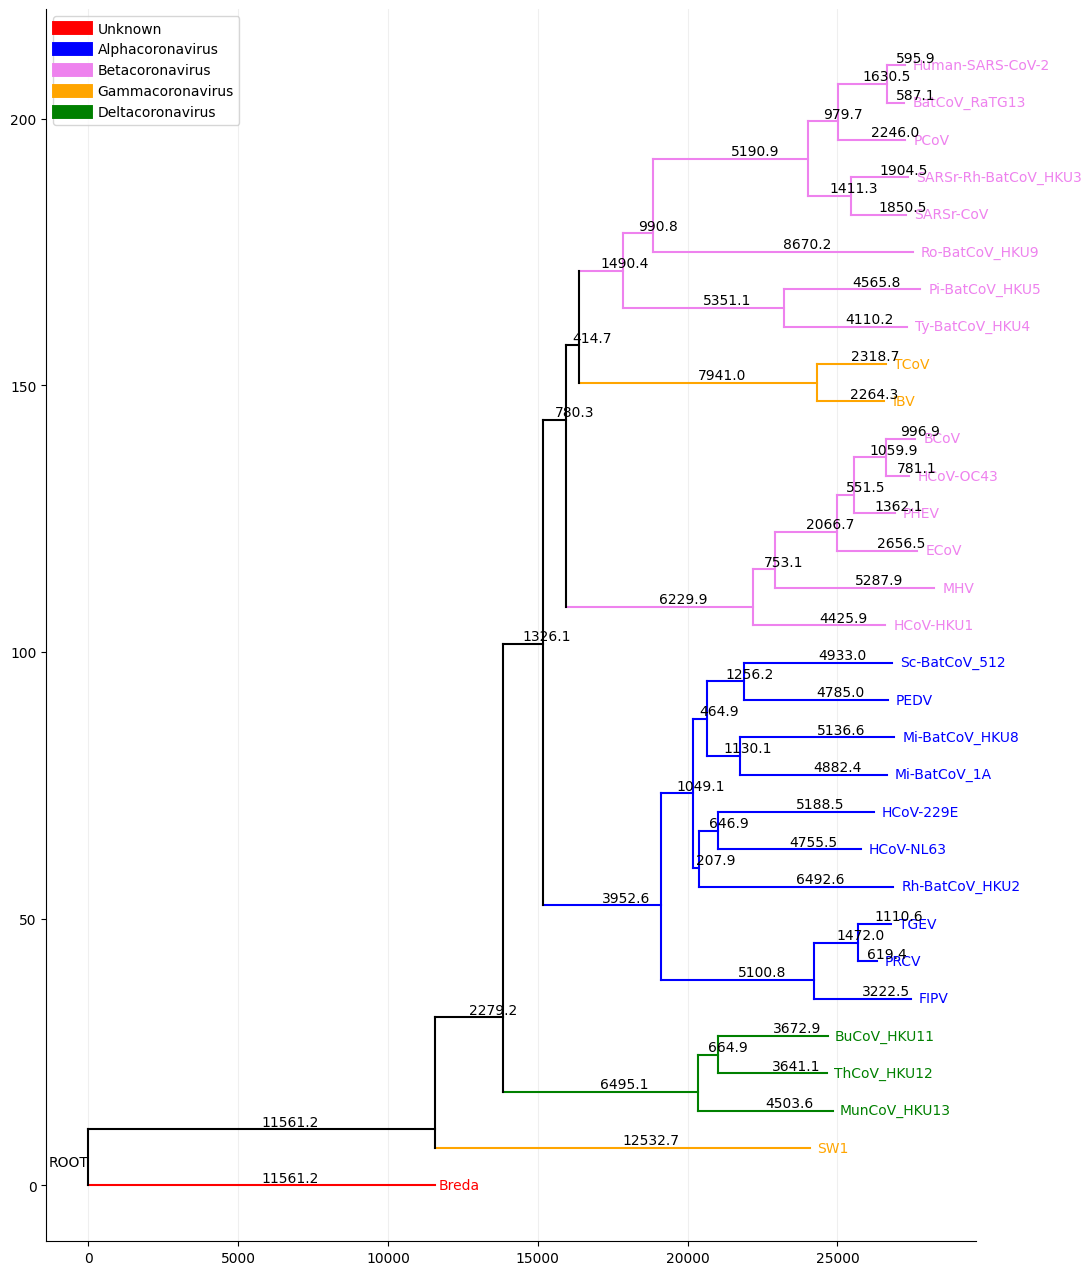

In [20]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='red', lw=10), 
                Line2D([0], [0], color='blue', lw=10),
                Line2D([0], [0], color='violet', lw=10), 
                Line2D([0], [0], color='orange', lw=10),
                Line2D([0], [0], color='green', lw=10)]

tree = neighbor_joining(distances, labels)
breda = find_node(tree, "Breda")
tree = reroot_tree(tree, breda)
sort_children(tree)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 16))
plot_nj_tree(tree=tree, ax=ax, height=3.5, colors=colors)
ax.legend(custom_lines, ['Unknown', 'Alphacoronavirus', 'Betacoronavirus', 'Gammacoronavirus', 'Deltacoronavirus'])

In [ ]:
phylogeny_comments = """
1. The groups are well seperated, the only issue in grouping is the seperation of Gammacoronaviruses
which splits the Betacoronaviruses group. Everything else seems in line with expectations, even
the subgroups of Betacoronaviruses are correct (even though i didn't annotate them specificly).
2. SARS-CoV-2 belongs in the Betacoronaviruses group and if the subgrouping is correct it should belong
in the Subgroup B of Betacoronaviruses.
"""

In [14]:
use_my_plot = "yes" # type "yes" if you allow your plot to be featured in a feeback session

## Problem 4: Recombination

We tend to think of evolution as a hierarchical process: we have some common ancestor that split into several sub-species through a series of random mutations. However, nothing is that straightforward in biology. There have been well-documented cases of horizontal gene transfer in nature where organisms swap entire chunks of DNA with each other. In viruses, something similar can happen as well. When a cell is infected with multiple virions (potentially different strains of the same virus), a *recombination event* can occur. Recombination occurs during the DNA copying process when, for whatever reason, the copier swaps out the virus template midway with a different template. For instance, we could start copying virus A, and then midway, the copier will switch to virus B, effectively resulting in new virus DNA that has DNA from both viruses A and B.

During the start of the global pandemic, there was much confusion about the origins of SARS-CoV-2. We initially thought it came from bats. Then, at some point, people noticed that a critical piece of the spike protein -- the receptor binding domain (RBD) -- was more similar to the sequence of pangolin coronaviruses. This evidence points to recombination. Before the virus jumped to humans, there must have been some host infected with both the Bat RaTG13 coronavirus and the Pangolin coronavirus where this recombination happened.

In this problem, we will look at the spike protein, look at the receptor binding domain, and check this evidence for recombination ourselves.

**Task**:
Find the spike proteins of the three viruses and align the sequences with each other using your global alignment implementation from the previous homework. Since we're comparing the differences between the bat and pangolin coronaviruses to the human virus, we only need to compute two alignments: human to bat and human to pangolin. We will then compare the differences between the two alignments. Find the RBD of SARS-CoV-2  using the [NCBI graphical view of the SARS-CoV-2 genome](https://www.ncbi.nlm.nih.gov/projects/sviewer/?id=NC_045512&tracks=[key:sequence_track,name:Sequence,display_name:Sequence,id:STD649220238,annots:Sequence,ShowLabel:false,ColorGaps:false,shown:true,order:1][key:gene_model_track,name:Genes,display_name:Genes,id:STD3194982005,annots:Unnamed,Options:ShowAllButGenes,CDSProductFeats:true,NtRuler:true,AaRuler:true,HighlightMode:2,ShowLabel:true,shown:true,order:9]&v=1:29903&c=null&select=null&slim=0) and look at the aminoacid similarity inside and outside the RBD. Similarly to the original publication, we will use a sliding window approach to calculate the similarity between sequences. Calculate the average number of matching amino acids for each window location in the alignment and plot the resulting similarity sequence. A window size of 100 is a good starting point. Perform this sliding window approach for both alignments and plot both similarity sequences in a single figure. Which coronavirus is more similar to SARS-CoV-2 in the RBD, and which is more similar outside the RBD? Create a visualization similar to the one in Fig. 2a from [the original Nature paper](https://www.nature.com/articles/s41586-020-2169-0)
to compare the human-to-bat and the human-to-pangolin alignments. Save your visualization to `recombination.png` and write down the mismatch rates and your comments/findings into `recombination_comments`.

**[10 points]**

Here are some things you may want to think about. Looking at your visualization, are there other regions in the spike gene (or elsewhere in the genome) that could be due to recombination? Could there be any alternative explanation for the differences in these regions?

In [ ]:
accession_codes = {
    "Human-SARS-CoV-2": "NC_045512",
    "Bat-CoV RaTG13": "MN996532",
    "Pangolin-CoV MP789": "MT121216",
}

In [ ]:
recombination_comments = """
"""

## Bonus 1: Bootstrap confidence

We performed an alignement, calulated pairwise distances and built a phylogenetic tree. Are we confident in our phylogenetic tree? The answer is, we don't know, because we never estimated the uncertainty of our solution.

In 1985, Joseph Felsenstein wrote an [article](https://pubmed.ncbi.nlm.nih.gov/28561359/) on estimating confidence limits of phylogenetic trees using a non-parametric bootstrap. It stands from the idea of creating bootstrap versions of alignment and building alternative phylogenetic trees. A confidence in a clade is then represented as a proportion of alternative trees that contain the same clade.

To generate a bootstrap version of alignment with length $N$, we sample $N$ alignment positions with replacement. Rearanging sequences accoring to a sequence of sampled indicies give us an alternative alignment. Based on new alignment we calculate the distance and apply neighbor joining algorithm to get an alternative tree.

Here we define a clade equivalence:
*Let $L$ be a set of leaf nodes in a clade from original tree and $L'$ be a set of leaf nodes in a clade from alternative tree. Let $L_1$ and $L_2$ be sets of leaf nodes of both children of a clade, such that $L = L_1 \bigcup L_2$. A clade of an alternative tree is considered the same if and only if $L = L'$ and ( $L_1 \bigcap L_1' = \emptyset\;\land\;L_2 \bigcap L_2'=\emptyset$ or $L_1 \bigcap L_2' = \emptyset\;\land\;L_2 \bigcap L_1'=\emptyset$ ).*

You are now given a Clustal mutliple sequence alignment of spike proteins from the same coronavirses as before. The alignment is store in `data/clustal_MSA_coronavirus_spike.fasta`. Again use Hamming distance for calculating distance and Breda virus as an outgroup.

**Task:** Construct a phylogenetic tree from spike protein MSA and use the bootstrap method for estimating confidence of each clade. Plot the phylogenetic tree and add confidence estimates on the plot.

**a)** Construct 100 alternative trees from bootstraped coronavirus alignments. Make sure you root your trees before estimating confidence.

**b)** Write a function to find a clade from the original tree in an alternative tree.

**c)** Calculate and asign confidence value of a clade to an attribute `Node.confidence`. Note that leaf nodes always have confidence 1.

**d)** Plot the phylogeny tree with confidence estimates using the same plotting function `plot_nj_tree` as in Problem 3. Do not plot confidence of leaf nodes.

Save your plot into `confidence_tree.png`.
Write your comments in `confidence_comments` variable. How does the phylogenetic tree compares to the one from Problem 3? Which part of the phylogenetic tree are we the least confident in?

**[10 points]**

In [ ]:
confidence_comments = """
"""

## Bonus 2: Radial dendrogram

Use the template `plot_nj_tree_radial` function in the file `helper_functions.py` to write a plotting function for a radial dendrogram using the `matplotlib` library.

Pseudocode for radial dedrogram is provided in the [implementation article](https://kops.uni-konstanz.de/bitstream/handle/123456789/5941/bbs_dpt_05.pdf?sequence=1&isAllowed=y).

Plot the radial dedrogram for coronavirus spike protein MSA in the `data/clustal_MSA_coronavirus_spike.fasta` file.
Save your figure in `radial_dendrogram.png`.

**[5 points]**